
# --------------------------------------------------------------------------------------
#             AIML Online Capstone - AUTOMATIC TICKET ASSIGNMENT
# --------------------------------------------------------------------------------------

In this capstone project, the goal is to build a classifier that can classify the tickets by analysing text. Details about the data and dataset files are given in below link, https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ
    

Milestone 1: Pre-Processing, Data Visualisation and EDA Overview

● Exploring the given Data files

● Understanding the structure of data

● Missing points in data

● Finding inconsistencies in the data

● Visualizing different patterns

● Visualizing different text features

● Dealing with missing values

● Text preprocessing

● Creating word vocabulary from the corpus of report text data

● Creating tokens as required

# Milestone 1: Pre-Processing, Data Visualisation and EDA Overview

### Importing Packages
    Here we are importing various packages, which will be used in this project

In [187]:
import numpy as np
import pandas as pd
import re


%matplotlib inline

from pylab import *
from sklearn.feature_extraction.text import CountVectorizer

import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Importing Dataset
    Note: Please provide the valid file_path, We will be importing the Excel file "Input Data Synthetic (created but not used in our project)".

In [188]:
file_path = r'/Users/thani/Documents/DW/PGP_AI_ML/Final_Project/'
file_name = r'Input Data Synthetic (created but not used in our project).xlsx'

In [189]:
dataset = pd.read_excel (file_path+file_name)


# Understanding the structure of data

The below output gives the quick idea about, how is the imported data looks like. Also, from header and tail view of 5 rows.

In [190]:
dataset.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [191]:
dataset.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


In [192]:
dataset.shape

(8500, 4)

The above result explains that the shape of the dataset, where in 8500 rows and 4 columns are there in give dataset.

In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8492 non-null object
Description          8499 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB


In [194]:
dataset.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


As per the above statistics we can infer the following

1. Short description
        This column is having 8492 rows out of 8500, might be some data missing 
        This column has 7481 unique records out of 8500 rows, might be having some duplicates
        This column is has password reset has a hightest frequency of 38
2. Description
        This column is having 8499 rows out of 8500, might be some data missing
        This column is having 7817 unique records out of 8500 rows, might be having some duplicates
        This column is having word 'the' has a highest frequency of 56
3. Caller
        The column caller has 8500 rows, and this has 2950 unique caller. Also the user bpctwhsn kzqsbmtp has reported high volumn of tickets of 810

4. Assignment group
        This column has 8500 rows and 74 unique group. Also, group GRP_0 is having highest frequency of 3976. This also explains that close to 40% belogs to one group. We should analyse deeper into this column

# Missing points in data

In [195]:
#identifying null values in the dataset
dataset.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [196]:
print("Short description column has ", round((8/8500)*100,2), "% missing data")
print("Description column has ", round((1/8500)*100,2), "% missing data")

Short description column has  0.09 % missing data
Description column has  0.01 % missing data


In [197]:
#since less than 1% of the data is null, we are ignoring for our analysis.
dataset = dataset.dropna()

#### As per the above analysis, we found that less than 1 % of the records in short description and description columns have missing data. With this we have taken decision to "Drop the 9 rows from give dataset. We belive that, this action will not impact the model"

In [198]:
#cross-validating the null or missing record
dataset.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [199]:
#validating the shape of the dataset after removing null values
dataset.shape

(8491, 4)

As per the above results we can see that the missing data has been removed from dataset.

# Finding inconsistencies in the data

In [200]:
print(dataset['Description'][2])



received from: eylqgodm.ybqkwiam@gmail.com

hi

i cannot log on to vpn

best 


In [201]:
#visualizing the sample data

Renaming column names of the dataset

In [202]:
dataset.rename(columns={'Short description' : 'Short_description',
                        'Assignment group' : 'Assignment_group'}, inplace='True')

In [203]:
dataset.head()

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


### We see that data inconsisency in the description and short description columns
#### there are some special characters in the dataset

        As part of this we will be applying the data transfermation process to clean the data

In [204]:

dataset.Description = dataset.Description.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
dataset.Short_description = dataset.Short_description.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

In [205]:
dataset.head()

,Short_description,Description,Caller,Assignment_group
0,login issue,verified user details employee manager name c...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hel...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi ...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


The below step will ensure that the description and short description columns will have same case

In [206]:
dataset.Description = dataset.Description.apply(lambda x: x.lower())
dataset.Short_description = dataset.Short_description.apply(lambda x: x.lower())

In [207]:
dataset.Description = dataset.Description.apply(lambda x: x.strip())
dataset.Short_description = dataset.Short_description.apply(lambda x: x.strip())

# Finding inconsistencies in the data

#### Understanding/Analyzing assignment group data consistency

In [208]:
dataset.groupby(dataset['Assignment_group']).size()

Assignment_group
GRP_0     3968
GRP_1       31
GRP_10     140
GRP_11      30
GRP_12     257
          ... 
GRP_71       2
GRP_72       2
GRP_73       1
GRP_8      661
GRP_9      252
Length: 74, dtype: int64

Dropping the Caller column, since its user information. this will not help for our analysis.

In [209]:
#dataset = dataset.drop('Caller', axis=1)

In [210]:
dataset['newcolumn'] = dataset['Short_description'] + ' ' + dataset['Description']
dataset.head(6)

,Short_description,Description,Caller,Assignment_group,newcolumn
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee man...
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,outlook received from hmjdrvpb komuaywn gmail ...
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from eylqgodm ybqk...
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...


In [211]:
dataset['newcolumn'].nunique()

6761

6761 unique tickets are there in dataset

In [212]:
dataset[dataset['newcolumn'].str.contains('account locked account locked')]

,Short_description,Description,Caller,Assignment_group,newcolumn
423,account locked,account locked,bkyphsgq cfyksehu,GRP_0,account locked account locked
1255,account locked,account locked,ewvibrfg atlurzdn,GRP_0,account locked account locked
1449,account locked,account locked,dyqekzuc djhznybt,GRP_0,account locked account locked
1525,account locked,account locked,ndrtahvm kjhdybzm,GRP_0,account locked account locked
1526,account locked,account locked,vgzmjkop rgeubdco,GRP_0,account locked account locked
2134,account locked,account locked,nsoikcyf jhybqael,GRP_0,account locked account locked
2424,account locked,account locked,tigwlquj evynjiar,GRP_0,account locked account locked
2943,account locked,account locked,qmgspxkf mckfysdh,GRP_0,account locked account locked
3075,account locked,account locked,sygionua szunhced,GRP_34,account locked account locked
3396,account locked,account locked,qifzkoej etbmgjvo,GRP_0,account locked account locked


The above result shows the duplicate questions

# Fixing Duplicate issue

In [213]:
new_df = dataset.filter(['newcolumn','Assignment_group'], axis=1)

In [214]:
new_df.drop_duplicates(subset ="newcolumn", 
                     keep = False, inplace = True) 

In [215]:
new_df.shape

(6475, 2)

In [216]:
print(round(100 - (6475/8541*100))," % of data is droped")

24  % of data is droped


In [217]:
new_df.head()

,newcolumn,Assignment_group
0,login issue verified user details employee man...,GRP_0
1,outlook received from hmjdrvpb komuaywn gmail ...,GRP_0
2,cant log in to vpn received from eylqgodm ybqk...,GRP_0
3,unable to access hr tool page unable to access...,GRP_0
5,unable to log in to engineering tool and skype...,GRP_0


In [218]:
#new_df.groupby(new_df['Assignment_group']).size()
g1 = new_df.groupby(['Assignment_group'], as_index=False).count()

In [219]:
#The result shows the sample data
print(new_df['newcolumn'][2])

cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best


In [220]:
print(dataset['newcolumn'][2])

cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best


In [221]:
dataset = new_df

The below columns to find the sentence length and word count for the rows

In [222]:
dataset['newcolumn_len'] = dataset['newcolumn'].astype(str).apply(len)
dataset['word_count'] = dataset['newcolumn'].apply(lambda x: len(str(x).split()))

# Visualizing different patterns

The below plot shows the sentance count distribution

In [223]:
binwidth = 50

(array([4.610e+02, 1.496e+03, 1.216e+03, 9.220e+02, 6.590e+02, 4.160e+02,
        3.020e+02, 1.950e+02, 1.610e+02, 9.100e+01, 7.600e+01, 5.300e+01,
        3.700e+01, 3.300e+01, 1.240e+02, 5.300e+01, 2.000e+01, 1.100e+01,
        1.200e+01, 1.200e+01, 2.000e+01, 1.200e+01, 1.300e+01, 8.000e+00,
        1.200e+01, 3.000e+00, 5.000e+00, 1.000e+00, 5.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

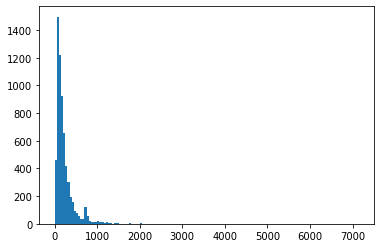

In [224]:
plt.hist(dataset['newcolumn_len'], bins=range(min(dataset['newcolumn_len']), max(dataset['newcolumn_len']) + binwidth, binwidth))

X sentence count Y frequecy

The plot shows the distribution by word count

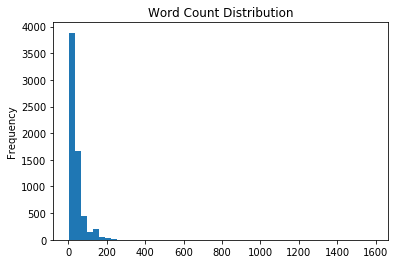

In [225]:
dataset['word_count'].plot(
    kind='hist',
    bins=50,
    title='Word Count Distribution')

X - wordcount, y - frequency

The below chart shows the Target variable distribution

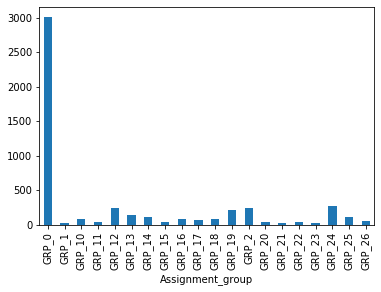

In [226]:
dataset.groupby('Assignment_group').count()['newcolumn'].head(20).plot(kind='bar')

The above chart describes that the record count of target variables

# Visualizing different text features & Creating word vocabulary from the corpus of report text data

#The distribution of top unigrams before removing stop words

to 7727
the 6511
is 3380
in 3243
com 2857
no 2825
not 2788
on 2640
from 2604
and 2550
for 2494
gmail 2190
please 2147
yes 1989
na 1910
company 1785
password 1778
of 1719
erp 1695
it 1675
tool 1583
received 1485
this 1458
access 1336
user 1311
my 1173
issue 1169
with 1143
unable 1136
reset 1091
sid 1056
you 1043
have 1005
can 959
error 948
am 883
email 874
are 841
at 827
hostname 819
site 812
be 809
outlook 802
working 793
ticket 784
we 777
that 746
when 739
help 729
as 725


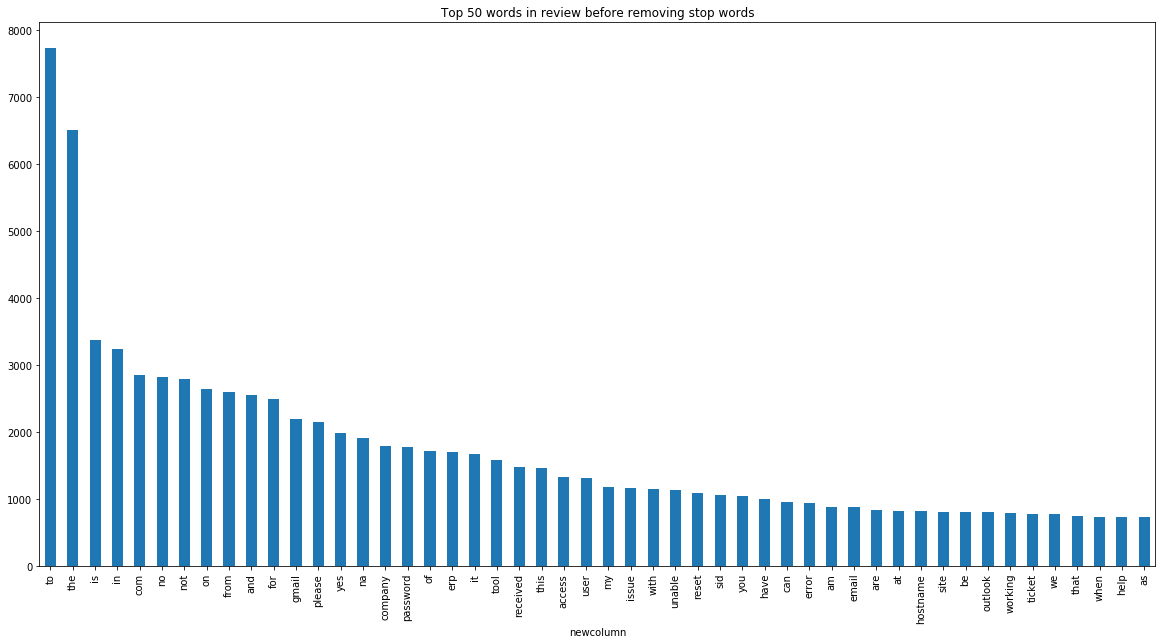

In [227]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(dataset['newcolumn'], 50)

for word, freq in common_words:
    print(word, freq)

dataset1 = pd.DataFrame(common_words, columns = ['newcolumn' , 'count'])

plt.subplots(figsize=(20,10))

dataset1.groupby('newcolumn').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 50 words in review before removing stop words')


#The distribution of top bigrams before removing stop words

gmail com 2190
yes no 1710
no na 1548
received from 1360
unable to 1125
is not 620
to the 609
company com 501
cid image 475
not working 453
able to 441
backup circuit 435
no yes 421
com hello 395
in the 387
engineering tool 383
password reset 378
access to 347
collaboration platform 326
telecom vendor 321
on the 315
et on 313
type of 308
of the 304
to login 287
is down 286
na company 285
na yes 285
not able 282
what type 282
of outage 282
scheduled maintenance 282
you please 277
need to 273
image png 268
com mailto 258
can you 255
erp sid 255
to be 241
please help 236
password for 236
login to 234
the user 233
password management 232
management tool 231
yes yes 227
com hi 221
it is 220
am et 213
to access 212


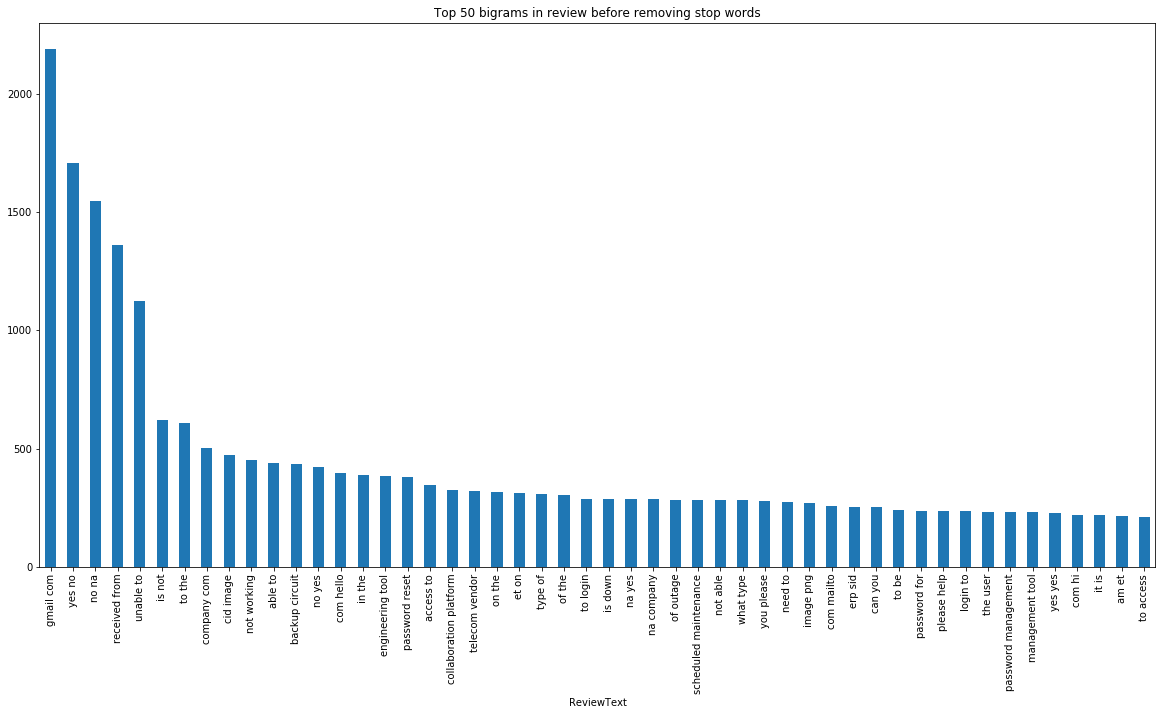

In [228]:

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(dataset['newcolumn'], 50)


for word, freq in common_words:
    print(word, freq)


dataset3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

plt.subplots(figsize=(20,10))

dataset3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 50 bigrams in review before removing stop words')


# The distribution of Top trigrams before removing stop words

yes no na 1548
no yes no 419
gmail com hello 373
na yes no 285
what type of 282
type of outage 282
no na company 281
not able to 278
cid image png 267
password management tool 231
yes yes no 227
cid image jpg 208
gmail com mailto 208
gmail com hi 207
to login to 197
am et on 189
backup circuit yes 181
is not working 180
browser microsoft internet 167
microsoft internet explorer 167
internet explorer email 167
com customer number 166
language browser microsoft 164
in job scheduler 162
customer number telephone 159
gmail com customer 158
number telephone summary 157
gmail com dear 156
is down since 154
unable to login 151
telecom vendor telecom 147
vendor telecom vendor 147
management tool password 145
when did it 143
did it start 142
site have backup 142
on backup circuit 142
of outage network 141
power please specify 141
please specify what 141
specify what type 141
of outage top 141
outage top cert 141
top cert site 141
no na when 141
na when did 141
scheduled maintenance power 141
sc

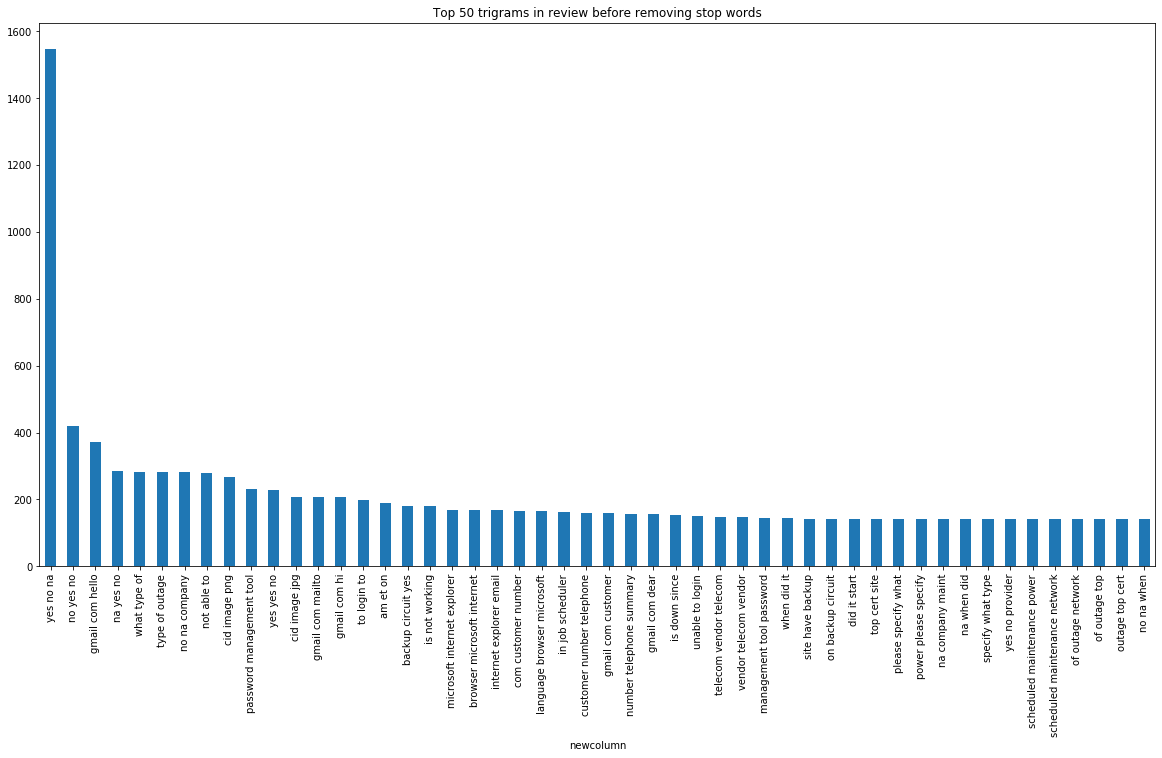

In [229]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(dataset['newcolumn'], 50)

for word, freq in common_words:
    print(word, freq)

dataset5 = pd.DataFrame(common_words, columns = ['newcolumn' , 'count'])

plt.subplots(figsize=(20,10))

dataset5.groupby('newcolumn').sum()['count'].sort_values(ascending=False).plot(kind='bar',title='Top 50 trigrams in review before removing stop words')


# Remove punctuation:

In [230]:
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [231]:
dataset['newcolumn'] = dataset['newcolumn'].apply(lambda X: remove_punctuation(X))

In [232]:
dataset['newcolumn'].head(10)

0     login issue verified user details employee man...
1     outlook received from hmjdrvpb komuaywn gmail ...
2     cant log in to vpn received from eylqgodm ybqk...
3     unable to access hr tool page unable to access...
5     unable to log in to engineering tool and skype...
6     event critical hostname company com the value ...
7     ticket no employment status new non employee e...
8     unable to disable add ins on outlook unable to...
10    engineering tool says not connected and unable...
11    hr tool site not loading page correctly hr too...
Name: newcolumn, dtype: object

The below sample shows that the result after removing punctuation

In [233]:
dataset['newcolumn'].iloc[0]

'login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved'

# Creating tokens as required

In [234]:
tokenizer = RegexpTokenizer(r'\w+')

In [235]:
dataset['newcolumn'] = dataset['newcolumn'].apply(lambda X: tokenizer.tokenize(X.lower()))

In [236]:
dataset['newcolumn'].head(10)

0     [login, issue, verified, user, details, employ...
1     [outlook, received, from, hmjdrvpb, komuaywn, ...
2     [cant, log, in, to, vpn, received, from, eylqg...
3     [unable, to, access, hr, tool, page, unable, t...
5     [unable, to, log, in, to, engineering, tool, a...
6     [event, critical, hostname, company, com, the,...
7     [ticket, no, employment, status, new, non, emp...
8     [unable, to, disable, add, ins, on, outlook, u...
10    [engineering, tool, says, not, connected, and,...
11    [hr, tool, site, not, loading, page, correctly...
Name: newcolumn, dtype: object

The below sample shows the tokenized values

In [237]:
dataset['newcolumn'].iloc[1]

['outlook',
 'received',
 'from',
 'hmjdrvpb',
 'komuaywn',
 'gmail',
 'com',
 'hello',
 'team',
 'my',
 'meetings',
 'skype',
 'meetings',
 'etc',
 'are',
 'not',
 'appearing',
 'in',
 'my',
 'outlook',
 'calendar',
 'can',
 'somebody',
 'please',
 'advise',
 'how',
 'to',
 'correct',
 'this',
 'kind']

# Remove stop words:

We imported a list of the most frequently used words from the NL Toolkit at the beginning with from nltk.corpus import stopwords. You can run stopwords.word(insert language) to get a full list for every language. There are 179 English words, including ‘i’, ‘me’, ‘my’, ‘myself’, ‘we’, ‘you’, ‘he’, ‘his’, for example. We usually want to remove these because they have low predictive power. There are occasions when you may want to keep them though. Such as, if your corpus is very small and removing stop words would decrease the total number of words by a large percent.

In [238]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [239]:
dataset['newcolumn'] = dataset['newcolumn'].apply(lambda X: remove_stopwords(X))

In [240]:
dataset['newcolumn'].head(10)

0     [login, issue, verified, user, details, employ...
1     [outlook, received, hmjdrvpb, komuaywn, gmail,...
2     [cant, log, vpn, received, eylqgodm, ybqkwiam,...
3     [unable, access, hr, tool, page, unable, acces...
5     [unable, log, engineering, tool, skype, unable...
6     [event, critical, hostname, company, com, valu...
7     [ticket, employment, status, new, non, employe...
8     [unable, disable, add, ins, outlook, unable, d...
10    [engineering, tool, says, connected, unable, s...
11    [hr, tool, site, loading, page, correctly, hr,...
Name: newcolumn, dtype: object

The below sample shows after removing stop words

In [241]:
dataset['newcolumn'].iloc[1]

['outlook',
 'received',
 'hmjdrvpb',
 'komuaywn',
 'gmail',
 'com',
 'hello',
 'team',
 'meetings',
 'skype',
 'meetings',
 'etc',
 'appearing',
 'outlook',
 'calendar',
 'somebody',
 'please',
 'advise',
 'correct',
 'kind']

# Stemming & Lemmatizing:

In [242]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/thani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [243]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [244]:
dataset['newcolumn'] = dataset['newcolumn'].apply(lambda X: word_lemmatizer(X))

The below sample shows after applying lemmatizing

In [245]:
dataset['newcolumn'].head(10)

0     [login, issue, verified, user, detail, employe...
1     [outlook, received, hmjdrvpb, komuaywn, gmail,...
2     [cant, log, vpn, received, eylqgodm, ybqkwiam,...
3     [unable, access, hr, tool, page, unable, acces...
5     [unable, log, engineering, tool, skype, unable...
6     [event, critical, hostname, company, com, valu...
7     [ticket, employment, status, new, non, employe...
8     [unable, disable, add, in, outlook, unable, di...
10    [engineering, tool, say, connected, unable, su...
11    [hr, tool, site, loading, page, correctly, hr,...
Name: newcolumn, dtype: object

In [246]:
dataset['newcolumn'].iloc[0]

['login',
 'issue',
 'verified',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'checked',
 'user',
 'name',
 'ad',
 'reset',
 'password',
 'advised',
 'user',
 'login',
 'check',
 'caller',
 'confirmed',
 'able',
 'login',
 'issue',
 'resolved']

In [247]:
#Stemmer

In [248]:
stemmer = PorterStemmer()

In [249]:
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [250]:
dataset['newcolumn_stemmer'] = dataset['newcolumn'].apply(lambda X: word_stemmer(X))

The below sample shows after applying stemming

In [251]:
dataset['newcolumn_stemmer'].head(10)

0     login issu verifi user detail employe manag na...
1     outlook receiv hmjdrvpb komuaywn gmail com hel...
2     cant log vpn receiv eylqgodm ybqkwiam gmail co...
3     unabl access hr tool page unabl access hr tool...
5     unabl log engin tool skype unabl log engin too...
6     event critic hostnam compani com valu mountpoi...
7     ticket employ statu new non employe enter user...
8     unabl disabl add in outlook unabl disabl add i...
10    engin tool say connect unabl submit report eng...
11    hr tool site load page correctli hr tool site ...
Name: newcolumn_stemmer, dtype: object

In [252]:
dataset['newcolumn_stemmer'].iloc[0]

'login issu verifi user detail employe manag name check user name ad reset password advis user login check caller confirm abl login issu resolv'

#The distribution of top unigrams after removing stop words

As part of the lemmatzation and stemmer analysis, it look like the lemmatization is better for example : lemmatization - issue , stemmer - issu

    in this case lemmatization is correct since its fixing the spellings

com 2857
gmail 2190
pleas 2147
ye 1989
password 1933
na 1910
compani 1786
erp 1695
tool 1680
receiv 1655
user 1533
issu 1386
access 1373
work 1137
unabl 1136
reset 1109
email 1057
sid 1056
need 1024
error 988
ticket 910
site 825
connect 824
hostnam 820
account 816
outlook 802
help 749
system 743
circuit 690
get 680
power 665
network 656
name 648
id 645
hello 635
problem 630
manag 607
login 600
vendor 590
chang 573
use 560
server 556
engin 538
new 530
messag 521
imag 515
report 510
backup 510
see 503
usa 500


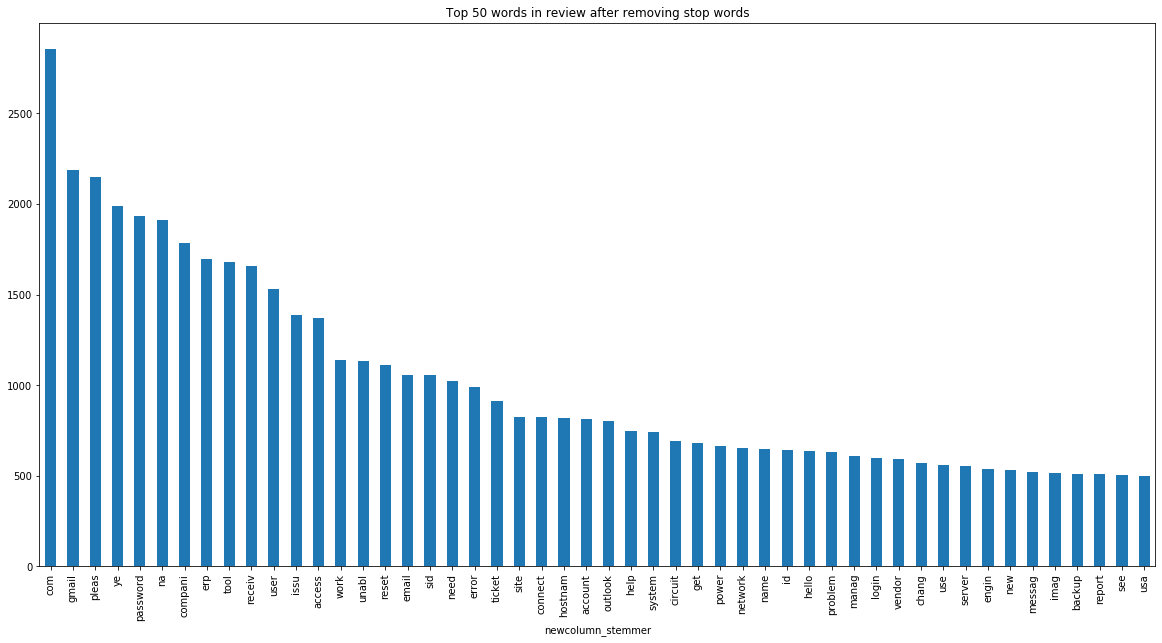

In [253]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(dataset['newcolumn_stemmer'], 50)

for word, freq in common_words:
    print(word, freq)

dataset1 = pd.DataFrame(common_words, columns = ['newcolumn_stemmer' , 'count'])

plt.subplots(figsize=(20,10))

dataset1.groupby('newcolumn_stemmer').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 50 words in review after removing stop words')


#Only considering lemmatized data for analysis.

In [254]:
def cvt(txt):
    txt = " ".join(i for i in txt)
    return txt

In [255]:
dataset['newcolumn'] = dataset['newcolumn'].apply(lambda X: cvt(X))

In [256]:
dataset['newcolumn'].iloc[0]

'login issue verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved'

In [257]:
#The distribution of top bigrams before removing stop words

gmail com 2190
yes na 1548
company com 501
cid image 475
backup circuit 435
engineering tool 406
com hello 395
password reset 385
reset password 365
collaboration platform 326
telecom vendor 321
na company 285
na yes 285
type outage 282
scheduled maintenance 282
image png 268
com mailto 258
erp sid 255
please help 243
circuit yes 238
password management 232
management tool 231
yes yes 230
error message 228
com hi 221
image jpg 211
internet explorer 192
inwarehouse tool 187
user id 182
tool password 176
sid sid 171
job scheduler 170
customer number 169
telephone summary 168
browser microsoft 167
microsoft internet 167
explorer email 167
com customer 167
probleme mit 167
pm et 166
language browser 166
global telecom 163
com dear 160
number telephone 159
telephony software 156
nwfodmhc exurcwkm 153
unable login 152
ticket global 152
na remote 147
vendor telecom 147


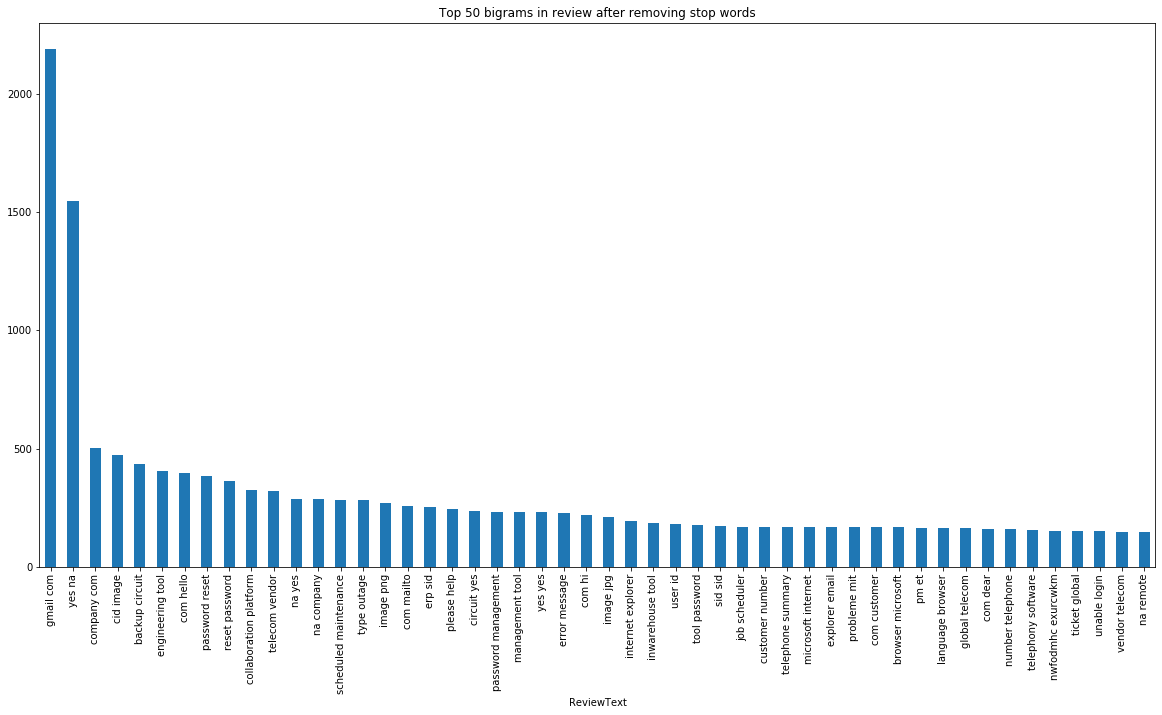

In [258]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(dataset['newcolumn'], 50)


for word, freq in common_words:
    print(word, freq)


dataset3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

plt.subplots(figsize=(20,10))

dataset3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 50 bigrams in review after removing stop words')


In [259]:
#The distribution of Top trigrams after removing stop words

gmail com hello 373
na yes na 285
yes na company 281
cid image png 267
backup circuit yes 238
password management tool 231
yes yes na 227
cid image jpg 208
gmail com mailto 208
gmail com hi 207
browser microsoft internet 167
microsoft internet explorer 167
internet explorer email 167
com customer number 166
language browser microsoft 164
customer number telephone 159
gmail com customer 158
gmail com dear 157
number telephone summary 157
telecom vendor telecom 147
vendor telecom vendor 147
management tool password 145
site backup circuit 142
ticket global telecom 142
type outage network 141
power please specify 141
please specify type 141
specify type outage 141
type outage top 141
outage top cert 141
top cert site 141
yes na start 141
scheduled maintenance power 141
scheduled maintenance network 141
na company maint 141
company maint yes 141
maint yes provider 141
yes provider maint 141
provider maint ticket 141
site contact notified 141
contact notified phone 141
notified phone email 

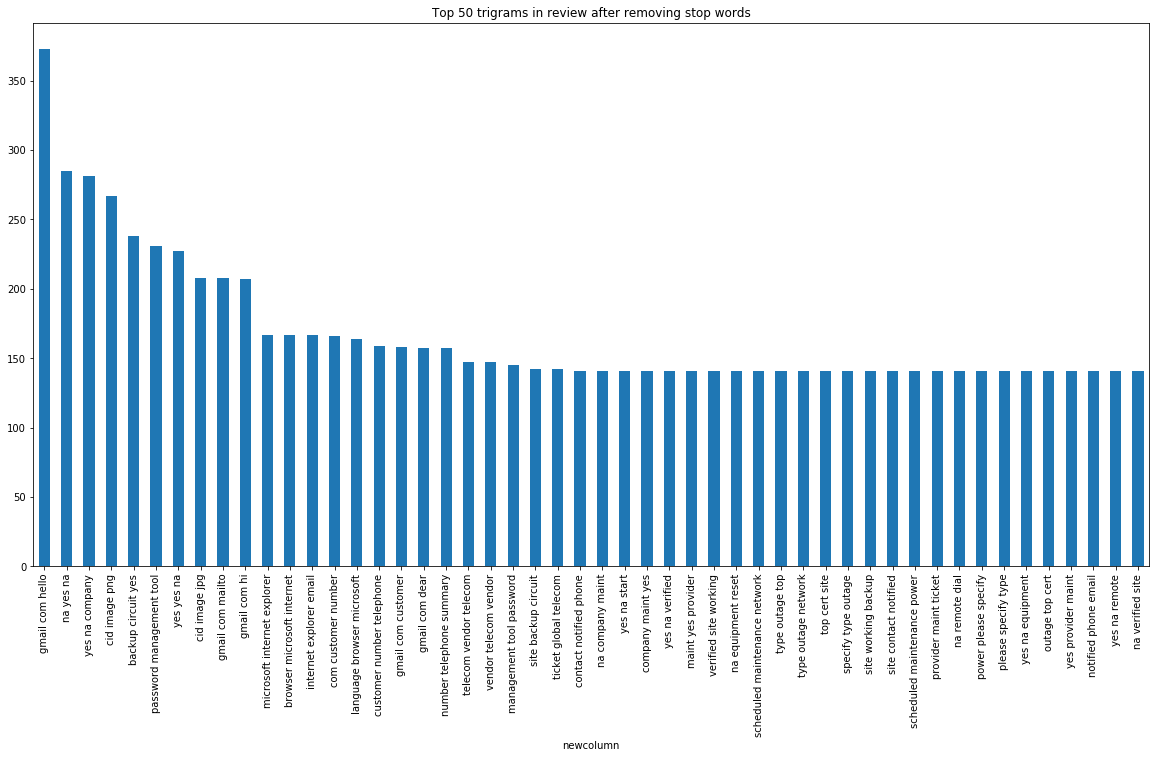

In [260]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(dataset['newcolumn'], 50)

for word, freq in common_words:
    print(word, freq)

dataset5 = pd.DataFrame(common_words, columns = ['newcolumn' , 'count'])

plt.subplots(figsize=(20,10))

dataset5.groupby('newcolumn').sum()['count'].sort_values(ascending=False).plot(kind='bar',title='Top 50 trigrams in review after removing stop words')


In [261]:
#!pip install wordcloud

The below word cloud shows that the top words after applying all the cleaning activities.

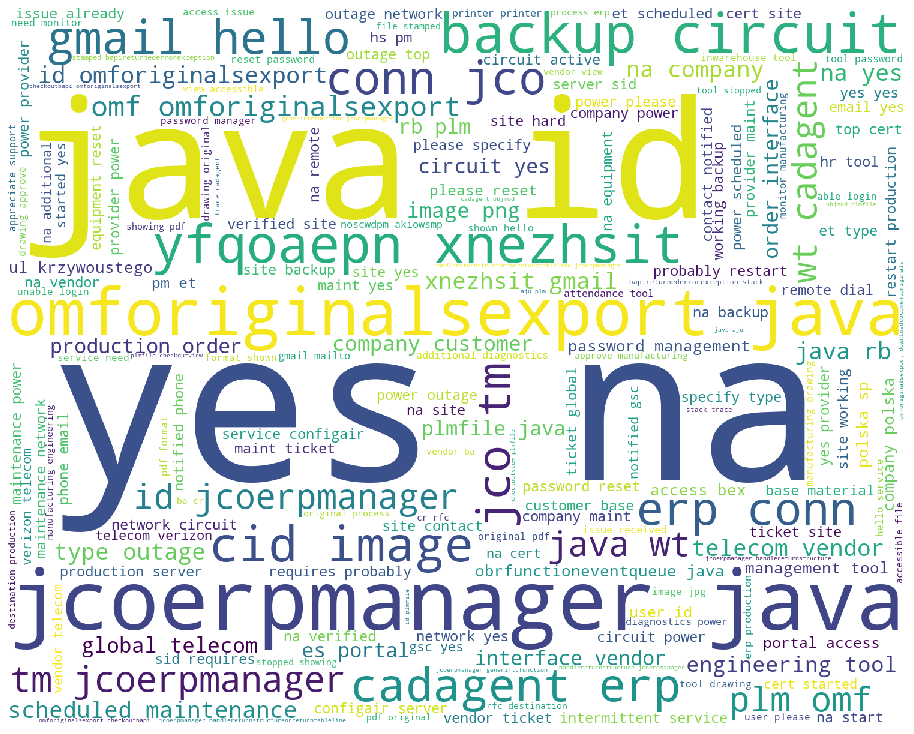

In [262]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS

import numpy as npy

from PIL import Image


ds_cloud = dataset['newcolumn'].head(100)



comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in ds_cloud: 
    # typecaste each val to string
    val = str(val)
    # split the value 
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        for words in tokens:
            comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1500, height = 1200,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words) 
# plot the WordCloud image
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# EDA END

References :
    
https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

